In [10]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

In [2]:
# choose path for your dataset
path_data = "../../dataset/"

In [3]:
df_train = pd.read_csv(path_data + 'train.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          int64
experiment    object
time          float64
seat          int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event         object
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB


In [9]:
subset = df_train.loc[(df_train['crew'] == 1) & (df_train['experiment'] == 'CA')]
subset.sort_values(by='time')

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.285450,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.596800,-3.951150,14.507600,-4520.000000,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.428420,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.354700,1.332120,17.750200,-4520.000000,817.705994,388.829987,A
2,1,CA,0.019531,1,10.671500,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.407600,1.537860,22.247000,-4520.000000,817.705994,388.829987,A
3,1,CA,0.023438,1,11.452500,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.336700,2.544920,18.998600,-4520.000000,817.705994,388.829987,A
4,1,CA,0.027344,1,7.283210,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.293200,1.699620,22.812799,-4520.000000,817.705994,388.829987,A
5,1,CA,0.031250,1,6.067460,23.128300,8.645660,14.380800,16.055500,26.925200,...,-9.289120,21.440599,23.253700,19.069599,-0.765018,26.451900,-4520.000000,817.705994,388.829987,A
6,1,CA,0.035156,1,-1.376020,20.972000,3.754160,13.766700,18.122000,29.391199,...,-0.604736,20.993401,21.556200,17.327299,1.465000,21.289301,-4520.000000,817.705994,388.829987,A
7,1,CA,0.039062,1,1.547870,18.398100,-9.113150,-1.033160,22.627001,32.816601,...,17.483601,22.912600,23.187000,18.462700,0.299232,23.691500,-4520.000000,817.705994,388.829987,A
8,1,CA,0.042969,1,-7.789460,12.210700,-8.953760,1.091740,28.526501,35.267200,...,16.681101,28.779600,28.382099,20.697300,-6.620750,31.672701,-4520.000000,817.705994,388.829987,A
9,1,CA,0.046875,1,-11.177500,18.235901,-1.035220,4.751110,25.983801,30.499100,...,0.489098,21.937500,21.629299,19.525999,-5.186040,21.618700,-4520.000000,817.705994,388.829987,A


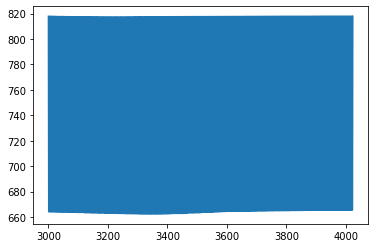

In [8]:
plt.plot(subset['r'][3000:4024])

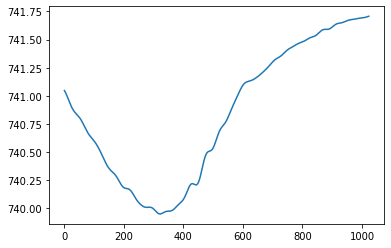

In [11]:
b, a = signal.butter(8,0.05)

y = signal.filtfilt(b, a, subset['r'], padlen=150)

plt.plot(y[3000:4024])

In [12]:
from biosppy.signals import ecg, resp

out = resp.resp(y,sampling_rate=256, show=False)

plt.plot(out['resp_rate_ts'], out['resp_rate'])
plt.ylabel('Respiratory frequency [Hz]')
plt.xlabel('Time [s]')

ModuleNotFoundError: No module named 'biosppy'